In [22]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [23]:
from torch import Tensor
import numpy as np
from typing import Final
import matplotlib.pyplot as plt
from abc import abstractmethod
from utils import *

In [24]:
class VisualizationHelper:

    WIDTH_BIAS : Final[int] = 1
    
    def __init__(self, t):
        self._tensor = t

    @abstractmethod
    def plot_height(self) -> int:
        raise NotImplementedError("This method is abstract!")
        
    @abstractmethod
    def plot_width(self, size : int) -> int:
        raise NotImplementedError("This method is abstract!")

    @abstractmethod
    def visualize_tensor(self, t : int) -> None:
        raise NotImplementedError("This method is abstract!")

    @property
    def tensor(self):
        return self._tensor
    
    @property
    def time(self) -> int:
        return self._time

In [25]:
class WinRateVHelper(VisualizationHelper):
    
    HEIGHT : Final[int] = 8
    MIN_WIDTH : Final[int] = 4
    WIDTH_DIVISOR : Final[int] = 6
    
    def __init__(self, t : Tensor):
        super().__init__(t)
        self._time = t.size()[0]
        
    def plot_height(self) -> int:
        return self.HEIGHT

    def plot_width(self) -> int:
        return min(12, max(self.MIN_WIDTH, self.time // self.WIDTH_DIVISOR + self.WIDTH_BIAS))
     
    def visualize_tensor(self, t : int = 0) -> None:
        if t < 0:
            t = 100
        elif t == 0:
            t = min(400, self.tensor.size()[0])
        plt.figure(1, figsize=(self.plot_width(), self.plot_height()))
        plt.xticks(list(range(0,t + 1, 50)))
        plt.yticks(list(np.arange(0.0, 1.1, 0.1)))
        plt.plot(self.tensor[:t], label="a")
        
    def visualize_tensor_range(self, end : int, start : int = 0) -> None:
        if end < start:
            raise ArithmeticError
        if end > self.tensor.size()[0] - 1:
            end = self.tensor.size()[0] - 1
        if start > end - 100:
            start = max(0, end - 100)
        if start + 400 <= end:
            end = min(start + 399, self.tensor.size()[0] - 1)
        plt.figure(1, figsize=(self.plot_width(), self.plot_height()))
        plt.xticks(list(range(start, end + 1, 50)))
        plt.yticks(list(np.arange(0.0, 1.1, 0.1)))
        plt.plot(self.tensor[start: end + 1])

In [26]:
class PlayerPositionVHelper(VisualizationHelper):
    
    MIN_WIDTH : Final[int] = 10
    MIN_HEIGHT : Final[int] = 10
    HEIGHT_DIVISOR : Final[int] = 52
    WIDTH_DIVISOR : Final[int] = 52
    
    def __init__(self, t, width : int, height : int):
        super().__init__(t)
        self._time = len(self.tensor)
        self._width = width
        self._height = height
        
    def plot_height(self) -> int:
        return max(self.MIN_HEIGHT, self.height // self.HEIGHT_DIVISOR + self.WIDTH_BIAS)
    
    def plot_width(self) -> int:
        return max(self.MIN_WIDTH, self.width // self.WIDTH_DIVISOR + self.WIDTH_BIAS)

    def visualize_tensor(self, t : int, show_pre : bool = False) -> None:
        if t < 0 or t >= self.time:
            raise ArithmeticError("@params time is out of bound!")
        plt.figure(1, figsize=(self.plot_width(), self.plot_height()))
        plt.xticks(list(range(0,self.width + 1, 20)))
        plt.yticks(list(range(0,self.height + 1, 20)))
        data_time = self.tensor[t]
        groupA = data_time[0]
        groupB = data_time[1]
        if show_pre and t > 0:
            data_time_pre = self.tensor[t - 1]
            groupAp = data_time_pre[0]
            groupBp = data_time_pre[1]
            plt.scatter(groupAp[0], groupAp[1], c = "red", s = 60, alpha=0.4)
            plt.scatter(groupBp[0], groupBp[1], c = "blue", s = 60, alpha=0.4)
        plt.scatter(groupA[0], groupA[1], c ="red", s = 60)
        plt.scatter(groupB[0], groupB[1], c ="blue", s = 60)
    
    @property
    def width(self) -> int:
        return self._width
    
    @property
    def height(self) -> int:
        return self._height

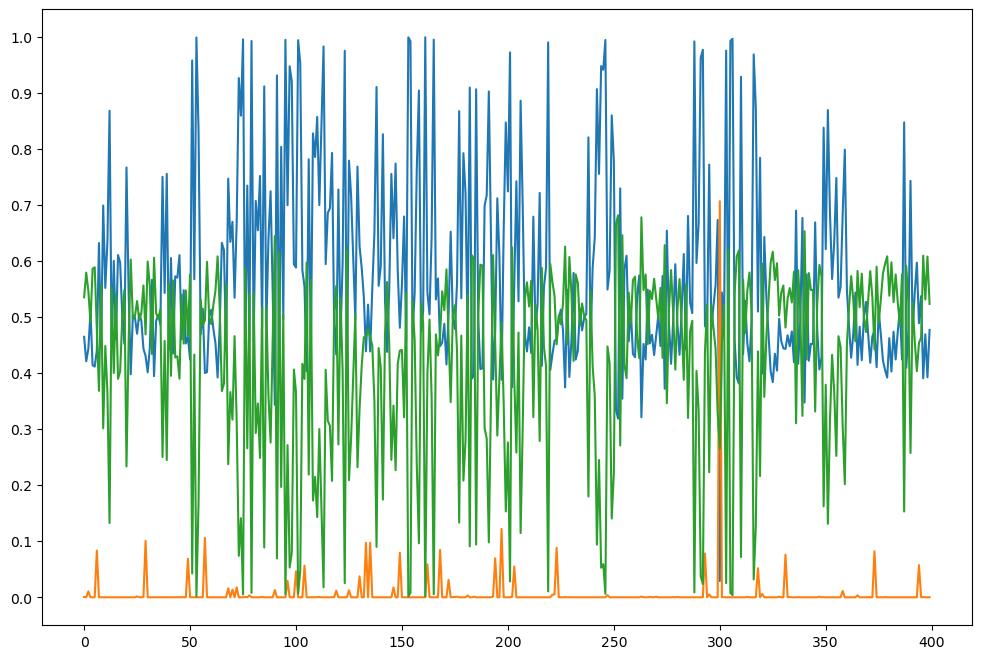

In [27]:
a = torch.load("results/0.pt")
helper = WinRateVHelper(a)
helper.visualize_tensor()

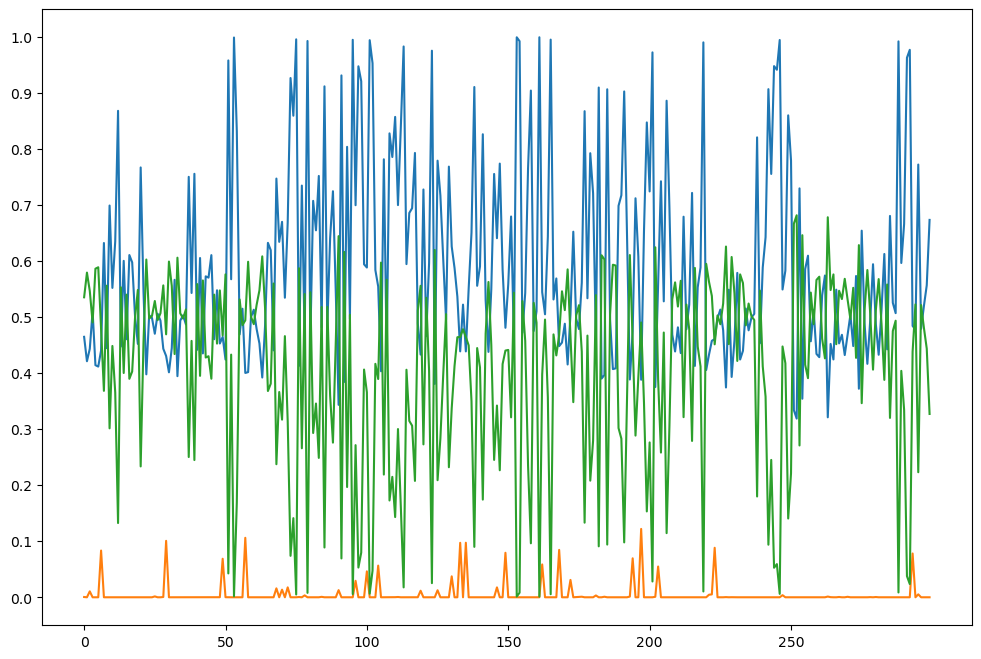

In [28]:
helper.visualize_tensor_range(end=299,start=0)

In [29]:
position_helper = PlayerPositionVHelper(get_location_data(load_data("data_finalized\\data_finalized.pickle"),1), 100, 100)

reading
loaded
Reading time:	 50.14317584037781


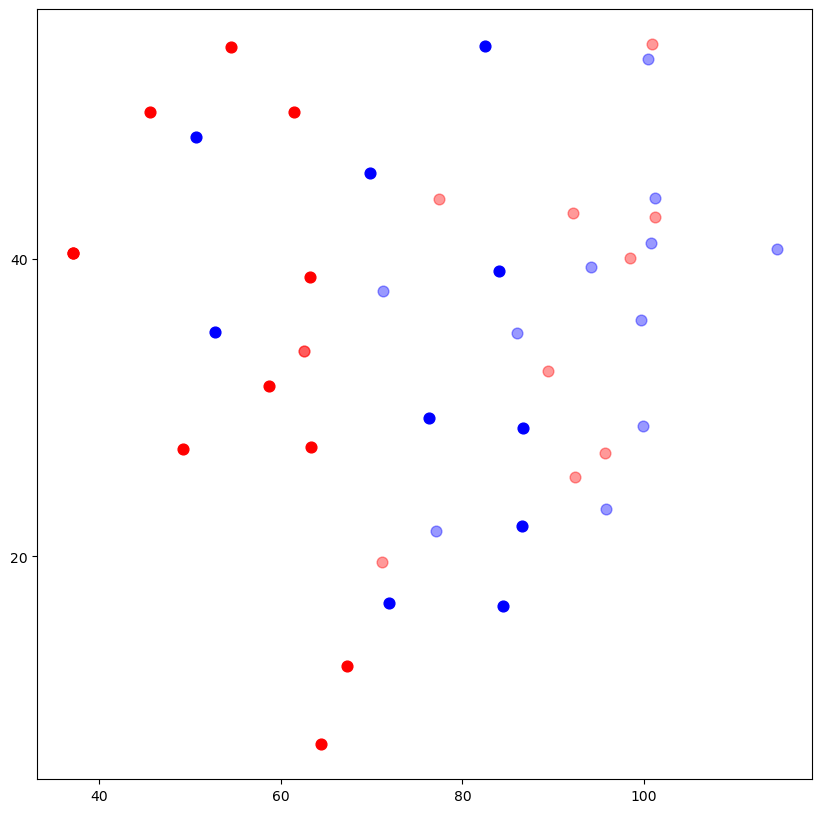

In [30]:
position_helper.visualize_tensor(2, True)